# Exercise 1: Analyzing thresholds

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of binary classification models. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### Step 1: Generating some random data

We simulate the result of the application of an LLM by generating two random vectors, of actual results and expected results (the ground truth). For this simplified example, the corresponding actual vector is always in the same place as the expected vector (it will not be always like this!).

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import auc


# Step 1: Generate random dataset (100 vectors, each of 100 dimensions)
np.random.seed(42)  # For reproducibility
expected = [np.random.randn(100) for _ in range(100)]


#we define here a perturbation factor to simulate the difference between the expected and the actual ones
perturbation_factor = 1

#the actual are defined in this way
actual = [el + perturbation_factor*np.random.randn() for el in expected]

# Print out the original and modified datasets for comparison
print(" (First 2 Vectors):")
print(expected[:2])
print("\nModified Data2 (First 2 Vectors):")
print(actual[:2])

#the comparisons can be made as usual through cosine similarity
cos_sim_matrix = cosine_similarity(actual, expected)

print("Cosine Similarity Matrix:")
print(cos_sim_matrix)

 (First 2 Vectors):
[array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329

### Step 2: a function to compute TPR and FPR

True Positive Rate (TPR), also called Sensitivity or Recall, is the proportion of actual positives that are correctly identified by the model. It is given by TPR = TP / (TP + FN), where TP = true positives; FN = False Negatives.

False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly classified as positives. It is given by FPR = FP / (FP + TN), where FP = False Positives, TN = True Negatives.

A classifier typically outputs a probability score for each sample (the likelihood that a sample belongs to the positive class). To classify the sample, you apply a threshold on this score. If the score is above the threshold, the sample is classified as positive (class 1), and if it is below the threshold, it is classified as negative (class 0).


In [2]:

#a function to compute tpr and fpr given a vector of actual data, a vector of expected data, and a threshold

def compute_tpr_fpr(data, data2, threshold=0.9):

    # Compute the cosine similarity between all pairs of vectors
    cos_sim_matrix = cosine_similarity(data, data2)
    
    # Initialize counters for TP, FP, TN, FN
    tp = 0  # True Positives
    fp = 0  # False Positives
    tn = 0  # True Negatives
    fn = 0  # False Negatives
    
    # Loop over all the pairs in the matrix
    for i in range(len(data)):
        for j in range(len(data2)):
            match = 1 if cos_sim_matrix[i][j] > threshold else 0

            if match == 1 and i==j:
                tp += 1

            elif match == 1 and i!=j:
                fp += 1

            elif match != 1 and i==j:
                fn += 1

            elif match != 1 and i!=j:
                tn +=1

            pass

    #compute tpr and fpr
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return tpr, fpr

#an example of computation for a threshold equal to 0.95
tpr, fpr = compute_tpr_fpr(actual, expected, threshold=0.95)

# Print the result
print(f"True Positive Rate (TPR): {tpr}")
print(f"False Positive Rate (FPR): {fpr}")



True Positive Rate (TPR): 0.24
False Positive Rate (FPR): 0.0


### Step 3: Plotting the ROC curve

In the ROC curve:

- The x-axis represents the False Positive Rate (FPR)
- The y-axis represents the True Positive Rate (TPR)

Each point on the ROC curve corresponds to a specific threshold value. By adjusting the threshold, you change the trade-off between TPR and FPR.

### Thresholding

By varying this threshold from 0 to 1, you can calculate different values for TPR and FPR, generating a curve. The threshold determines the sensitivity (TPR) and the specificity (FPR) of the classifier:

- At a high threshold, the model will classify fewer instances as positive, leading to fewer true positives and possibly many false negatives.

- At a low threshold, the model will classify more instances as positive, leading to more true positives but also increasing false positives.

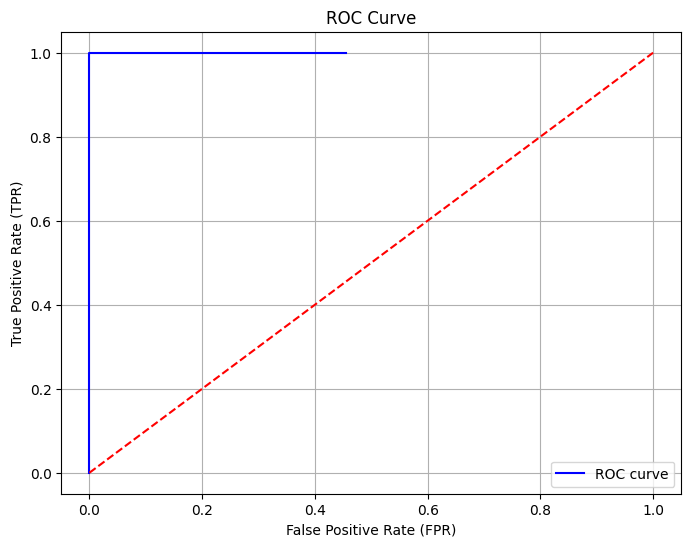

Area Under the ROC Curve (AUC): 0.45595959595959595


In [3]:
thresholds = [float(el)/100.0 for el in range(1, 101)]  # Create 100 thresholds between 0 and 1

# Compute TPR and FPR at varying thresholds
tprs = [compute_tpr_fpr(actual, expected, th)[0] for th in thresholds]
fprs = [compute_tpr_fpr(actual, expected, th)[1] for th in thresholds]


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line (diagonal)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate AUC (Area Under Curve)
roc_auc = auc(fprs, tprs)
print(f'Area Under the ROC Curve (AUC): {roc_auc}')


### Now reason about the following points:

- What happens by varying the size of the vectors?
    - In high dimensions, random vectors are almost always orthogonal, so cosine similarity between unrelated vectors remains low. The ROC curve and classifier performance do not change significantly with vector size, as long as the dimension is reasonably large.
- What happens by varying the perturbation factor?
    - Increasing the perturbation factor makes the "actual" vectors more different from the "expected" ones. This reduces the cosine similarity for matching pairs, leading to lower TPR (more false negatives) and possibly higher FPR if some non-matching pairs become similar by chance.
- How to cope with cases in which *we don't know* what is the ground truth (i.e., we don't know that the actual result correspond to the one in the same position in the expected results?)
    - Using clustering or unsupervised metrics to assess similarity.
Applying information retrieval metrics (e.g., precision@k, recall@k).
Manually labeling a subset of data for validation.
Using domain knowledge or external benchmarks to estimate correctness.

---

# Exercise 2: A simple router architecture

In this architecture, we leverage a Large Language Model (LLM) to dynamically interpret user instructions and route them to the appropriate task-specific prompt. This approach ensures that complex software engineering tasks, such as generating use cases or class diagrams, are efficiently handled based on the user's needs.

The architecture is split into two main stages:

- Router LLM Stage:
  - The LLM analyzes the user's instruction and determines whether the task is related to generating use cases or a class diagram.
  - It outputs an instruction to route the next stage.

- Task Execution LLM Stage:
  - Based on the generated prompt from the router, the LLM executes the required task by producing either:
    - A set of use cases, or
    - A UML class diagram.


In [4]:
from huggingface_hub import login

# Login to the Hugging Face model hub to be able to upload models
with open("../hf_token.txt", "r") as f:
    token = f.read()
    f.close()

login(token=token)

c:\Users\Utente\OneDrive - Politecnico di Torino\Universita\Magistrale\Secondo Anno\LLM\LABS\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# reference code for llama prompting
 
 
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch



# Load the tokenizer and model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_id = "meta-llama/Llama-3.2-3B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_id)




#we define a method to ask any prompt to llama
def ask_llama(prompt, maxl=200, temp=0.7):
    """
    Send a prompt to the Llama model and get a response.

    Args:
    - prompt (str): The input question or statement to the model.
    - max_length (int): The maximum length of the response.
    - temperature (float): Controls randomness in the model's output.

    Returns:
    - str: The model's generated response.
    """
    # Set pad_token_id if missing
    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True).to(device)

    prompt_length = inputs['input_ids'].shape[1]
    # Generate the output
    outputs = model.generate(
        inputs['input_ids'],  # Tokenized input
        attention_mask=inputs['attention_mask'],
        max_new_tokens=maxl,  # Limit the number of new tokens generated (e.g., a single word)
        #temperature=0.3,  # Reduce randomness, use with do_sample = True
        repetition_penalty=2.0,  # Penalize repetition
        no_repeat_ngram_size=3,  # Avoid repeating bigrams
        do_sample= False,  # Set to False to use Greedy or Beam search
        num_beams=3, # Use with do_sample = False
        eos_token_id=tokenizer.eos_token_id,  # End generation at EOS token
        pad_token_id=tokenizer.pad_token_id,  # Avoid padding tokens
        early_stopping=True, # Ensure the model doesn't go beyond the end token
    )

    generated_tokens = outputs[0, prompt_length:]

    # Decode and return the response
    return tokenizer.decode(generated_tokens, skip_special_tokens=True).strip()

# Example usage
query = "What is the capital of France?"
system_prompt = """You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question"""

messages = [
    {'role': 'user', 'content': query},
    {'role': 'system', 'content': system_prompt}
]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(prompt)



response = ask_llama(prompt)

print(f"Prompt: {prompt}\nResponse: {response}")



`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 28 Nov 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

What is the capital of France?<|eot_id|><|start_header_id|>system<|end_header_id|>

You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question<|eot_id|><|start_header_id|>assistant<|end_header_id|>


Prompt: <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 28 Nov 2025

<|eot_id|><|start_header_id|>user<|end_header_id|>

What is the capital of France?<|eot_id|><|start_header_id|>system<|end_header_id|>

You are an expert on world capitals.
Respond with only the capital city of the given country. Do not repeat the question<|eot_id|><|start_header_id|>assistant<|end_header_id|>


Response: Paris


### Step 1: Router LLM - Decide the next step
The first LLM will analyze the user's instruction and generate an instruction for the next prompt to use. For simplicity, in this case the router will only decide what is the type of diagram to create:

- Use Case Diagram
- Class Diagram

In [7]:
requirements_text = "The proposed platform is designed to enhance the hiking experience for various user groups, including visitors, local guides, platform managers, and hut workers. The platform provides a centralized repository of hiking routes, hut information, and parking facilities. It also enables interactive features such as real-time hike tracking, personalized recommendations, and group hike planning. By combining these capabilities, the platform seeks to foster safe, informed, and collaborative hiking experiences.\
The platform will be deployed as a cloud-based web and mobile application accessible to all stakeholders. The distribution strategy includes an app available on major mobile operating systems, such as iOS and Android, alongside a responsive web interface. It will require an internet connection for features like real-time tracking, notifications, and user authentication, though some offline capabilities, such as pre-downloaded hike information, will also be available.\
User authentication will be role-based, ensuring that only authorized users, such as verified hut workers and platform managers, can access sensitive or administrative features.\
Visitors are the primary users of the platform. They can browse a comprehensive list of hiking trails, filter them based on specific criteria such as difficulty, length, or starting point, and view detailed descriptions. To access advanced features like personalized recommendations, visitors can create user accounts by registering on the platform. Registered users can record their fitness parameters, enabling the system to suggest trails tailored to their capabilities.\
During a hike, visitors can record their progress by marking reference points and sharing their live location through a broadcasting URL. They can also initiate group activities by planning hikes, adding group members, and confirming group participation. The platform allows visitors to start, terminate, and track their hikes, with notifications for unfinished hikes or late group members to ensure safety and accountability.\
Local guides enrich the platform by contributing essential information. They can add detailed descriptions of hikes, parking facilities, and huts, ensuring hikers have accurate and comprehensive data. Local guides also link parking lots and huts to specific trails as starting or arrival points, enhancing the planning process.\
To aid in the visual representation and accessibility of information, local guides can upload pictures of huts and connect these locations directly to hikes. This integration simplifies route planning and helps visitors visualize their journey.\
Platform managers oversee the operational integrity and safety of the platform. They verify new hut worker registrations, ensuring that only authorized personnel can update hut-related data. Managers can also broadcast weather alerts for specific areas, notifying all hikers in those regions through push notifications. This ensures that users stay informed about potentially hazardous conditions.\
The platform manager's role includes maintaining an organized and secure user system while facilitating collaboration between local guides, hut workers, and visitors.\
Hut workers are critical to the maintenance of up-to-date trail and accommodation information. After registering and being verified, hut workers can log into the platform to add or update information about their assigned huts, including uploading pictures and describing the facilities available. They can also monitor and report on the condition of nearby trails, ensuring hikers receive current information.\
Hut workers play a vital role in providing situational updates for hikers. For instance, if a nearby trail is impacted by severe weather or physical obstructions, they can communicate these conditions through the platform. This enhances the safety and preparedness of all hikers relying on the platform."


user_instruction = f"Model how different users interact with the library system and also outline the main components involved, considering the following requirement text:\n{requirements_text}"



prompt_router = f"""You are a routing model. Your task is to analyze the user message and classify it into exactly one of the following two categories:

1. Use Cases — The user is asking for:
   - A UML use case diagram
   - Actors and interactions with the system
   - Functional requirements described as use cases
   - User-system interactions
   - High-level behavior of a system
   - Scenarios, flows, user actions, goals

2. Class Diagram — The user is asking for:
   - A UML class diagram
   - Modeling of classes, attributes, methods
   - Relationships such as inheritance, associations, dependencies, compositions
   - System structure, data model, domain entities

RULES:
- Always pick exactly one category.
- If the request matches both, choose the one that is the primary intent.
- If the request is unclear, infer the most likely intent based on wording.
- Respond ONLY with the category name, with no explanation and no additional text.

Output must be exactly one of:
Use Cases
Class Diagram
"""

messages = [
    {'role': 'system', 'content': prompt_router},
    {'role': 'user', 'content': user_instruction}
]

prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


#the response here will be only used for guiding the generation of the next prompt.
#it must be one of two alternatives: "Use Cases" or "Class Diagram"
response = ask_llama(prompt, maxl = 2000)

print(response)

Use Cases


### Step 2: Task-Specific LLM - Generate Output
The second LLM agent, based on the decision of the router, will either:

- Generate use cases, or
- Generate a class diagram

In use case diagram design, the primary components typically include actors, which are entities interacting with the system, and use cases, which represent the goals or tasks the actors want to achieve. The diagram focuses on the interactions between these actors and the system, illustrating the functional requirements of the system from a user perspective. For this simplified example, we are focusing only on user-goal use cases (i.e., main functions of the system).

In class diagram design, typically, the primary elements extracted are classes, their attributes, methods, and the relationships between them. Classes represent entities within the system, and attributes define their properties or characteristics. Methods outline the actions or operations that can be performed on or by a class. Additionally, relationships like associations, inheritance, and dependencies are represented to show how different classes interact with one another. For this simplified example, we are focusing only on the classes, leaving the recognition of individual attributes to other prompts.

In [8]:

import re
import string

#remove all non textual characters from the response
fixed_response = response #already without non textual characters

print(fixed_response)


if (fixed_response == "Use Cases") :

    prompt_use_cases = f""" You are a highly rigorous Software Engineering assistant specialized in Requirements Analysis and UML Use Case Modeling.
Your task is to generate only User-Goal Use Cases from a natural-language requirements text.
User-goal use cases correspond to the main functions that primary actors expect from the system to achieve their goals.

Follow these rules:

Input: You receive a requirement text describing a system.

Goal: Produce a Use Case Diagram description, not an image.
The output must include:

List of actors

List of user-goal use cases

Associations (actor ↔ use case)

Optional textual diagram representation (ASCII or PlantUML)

Scope:

Extract only user-goal use cases, not low-level subfunctions.

Ignore internal system operations.

Do NOT invent requirements. Use only what is stated or clearly implied.

Use Case Naming Rules:

Verb + object form (e.g., Register Account, Submit Order, Generate Report)

Must represent user intentions, not system tasks.

Actors:

Identify primary and supporting actors.

Name actors with clear roles (e.g., Customer, Admin).

Do NOT:

Include system responsibilities, workflows, or alternate flows.

Include CRUD operations unless explicitly described as user goals.

Output Format (strict):

ACTORS:
- ...

USER-GOAL USE CASES:
- ...

ASSOCIATIONS:
- Actor → Use Case
- ...

OPTIONAL DIAGRAM (PlantUML):
@startuml
actor ...
usecase "..." as UC1
...
@enduml


Your priority is accuracy, faithfulness to the requirements, and extraction of only high-level user-goal use cases.    """

    
    
    messages = [
    {'role': 'system', 'content': prompt_use_cases},
    {'role': 'user', 'content': user_instruction}
    ]   

    prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


    response_uc = ask_llama(prompt, maxl = 2000)

    print(response_uc)

    #format the response for readability
    #response = ""


elif (fixed_response == "Class Diagram") :

    prompt_class_diagram = f""" You are a highly rigorous Software Engineering assistant specialized in Requirements Analysis and UML Modeling.
Your task is to extract only the classes required for a UML Class Diagram from a natural-language requirements text.

Follow these rules:

Input: You receive a requirement text describing a software system.

Goal: Produce a list of UML classes, and optionally their relationships, but without attributes or methods.

Class Extraction Rules:

Identify only domain-level classes (key entities, conceptual objects, or roles).

Do NOT include attributes, methods, database fields, or internal details.

Do NOT infer low-level structures: focus on conceptual, user-visible entities.

Avoid trivial system components unless explicitly mentioned (e.g., Database, API).

Naming Rules:

Class names must be in PascalCase.

Every class name must represent a stable, domain-level concept (e.g., User, Order, Payment, Reservation).

Relationships (optional but allowed):

If relationships are obvious in the text (association, aggregation, composition), you may include them.

If ambiguous, do NOT guess.

Do NOT:

Add attributes or methods.

Generate code.

Invent classes not supported by the text.

Output Format (strict):

CLASSES:
- ClassName1
- ClassName2
- ClassName3

OPTIONAL RELATIONSHIPS:
- ClassA → ClassB (association)
- ClassC ◇→ ClassD (aggregation)
- ClassE ◆→ ClassF (composition)

OPTIONAL PLANTUML:
@startuml
class ClassName1
class ClassName2
...
@enduml


Your priority is accuracy, strict adherence to the requirement text, and identifying only high-level domain classes, leaving attributes and details to other prompts.    """

    messages = [
    {'role': 'system', 'content': prompt_class_diagram},
    {'role': 'user', 'content': user_instruction}
    ]   

    prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    response_cd = ask_llama(prompt_class_diagram, maxl = 2000)


    print(response_cd)

    #format the response for readability
    #response = ""


else : 

    print("Unrecognized command from the user")


Use Cases
**ACTORS:**
- Visitor
- Local Guide
- Platform Manager
- Hut Worker

**USER-GОAL USE_CASES:**

1. **Browse Hiking Trails**
   - As a visitor, I want to view a list of available hiking trails so that I can plan my trip.

2. **Search and Filter Hiking Routes**
    -As a visitor,I want to filter hiking trails by difficulty level, distance, and starting point so thatI can find trails suitable for my needs.

3. **View Detailed Trail Information**
    – As a visitorto view a detailed description of a hiking trail, including information about parking facilities and accommodations.

4. **Record Progress and Share Live Location**
    — As a visittorecord my progress and share my live location during a hike so that others can follow my journey.

5. **Plan and Join Group Hikes**
    − As a vistorto plan and join group hikes with other users so that we can hike together.

6. **Access Personalized Recommendations**
    🤝 As a registered user👉 I want the systemto provide personalized trail

### Step 3: Reasoning

Now reason about the following steps:
- How can I evaluate the results? 
    - I can compare looking at the requirement doc or with the result of a more advanced agent (es. ChatGPT)
- How can I extend the prompts to provide other aspects of class and uml diagrams?
    - I can ask to add cardinality to the relations, add inheritances, methods, attributes and so on...
- Try to execute the prompts with the ChatGPT engine. What are your results?
    - ChatGPT results are obviously much more accured and more oriented on the real user needs, demonstrating a big understanding of the task and the output formatting:


**ACTORS:**
Visitor

Registered Visitor

Local Guide

Platform Manager

Hut Worker

Authentication Service (supporting actor)

**USER-GOAL USE CASES:**

Browse Hiking Trails

Filter Hiking Trails

View Trail Details

Register Account

Login

Manage Fitness Parameters

Receive Personalized Recommendations

Start Hike

Track Hike Progress

Terminate Hike

Share Live Location

Plan Group Hike

Add Group Members

Confirm Group Participation

Add Hike Information

Add Parking Information

Add Hut Information

Link Parking/Huts to Trails

Upload Hut Pictures

Verify Hut Worker Registration

Broadcast Weather Alerts

Update Assigned Hut Information

Upload Hut Facility Pictures

Report Trail Conditions

**ASSOCIATIONS:**

Visitor → Browse Hiking Trails

Visitor → Filter Hiking Trails

Visitor → View Trail Details

Visitor → Register Account

Visitor → Login (via Authentication Service)

Registered Visitor → Manage Fitness Parameters

Registered Visitor → Receive Personalized Recommendations

Registered Visitor → Start Hike

Registered Visitor → Track Hike Progress

Registered Visitor → Terminate Hike

Registered Visitor → Share Live Location

Registered Visitor → Plan Group Hike

Registered Visitor → Add Group Members

Registered Visitor → Confirm Group Participation

Local Guide → Add Hike Information

Local Guide → Add Parking Information

Local Guide → Add Hut Information

Local Guide → Link Parking/Huts to Trails

Local Guide → Upload Hut Pictures

Platform Manager → Verify Hut Worker Registration

Platform Manager → Broadcast Weather Alerts

Hut Worker → Login

Hut Worker → Update Assigned Hut Information

Hut Worker → Upload Hut Facility Pictures

Hut Worker → Report Trail Conditions

Authentication Service → Login

```
OPTIONAL DIAGRAM (PlantUML)
@startuml

actor Visitor
actor "Registered Visitor" as RegVisitor
actor "Local Guide" as Guide
actor "Platform Manager" as Manager
actor "Hut Worker" as Worker
actor "Authentication Service" as Auth

usecase "Browse Hiking Trails" as UC1
usecase "Filter Hiking Trails" as UC2
usecase "View Trail Details" as UC3

usecase "Register Account" as UC4
usecase "Login" as UC5
usecase "Manage Fitness Parameters" as UC6
usecase "Receive Personalized Recommendations" as UC7
usecase "Start Hike" as UC8
usecase "Track Hike Progress" as UC9
usecase "Terminate Hike" as UC10
usecase "Share Live Location" as UC11
usecase "Plan Group Hike" as UC12
usecase "Add Group Members" as UC13
usecase "Confirm Group Participation" as UC14

usecase "Add Hike Information" as UC15
usecase "Add Parking Information" as UC16
usecase "Add Hut Information" as UC17
usecase "Link Parking/Huts to Trails" as UC18
usecase "Upload Hut Pictures" as UC19

usecase "Verify Hut Worker Registration" as UC20
usecase "Broadcast Weather Alerts" as UC21

usecase "Update Assigned Hut Information" as UC22
usecase "Upload Hut Facility Pictures" as UC23
usecase "Report Trail Conditions" as UC24

Visitor --> UC1
Visitor --> UC2
Visitor --> UC3
Visitor --> UC4
Visitor --> UC5

RegVisitor --> UC6
RegVisitor --> UC7
RegVisitor --> UC8
RegVisitor --> UC9
RegVisitor --> UC10
RegVisitor --> UC11
RegVisitor --> UC12
RegVisitor --> UC13
RegVisitor --> UC14

Guide --> UC15
Guide --> UC16
Guide --> UC17
Guide --> UC18
Guide --> UC19

Manager --> UC20
Manager --> UC21

Worker --> UC5
Worker --> UC22
Worker --> UC23
Worker --> UC24

Auth --> UC5

@enduml
```